Installing dependencies

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

Dependencies

In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt

Load data

In [ ]:
data_dir="/content/drive/MyDrive/corals_img/"

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [ ]:

for image_class in os.listdir(data_dir):
  print(len(os.path.join(data_dir,image_class)))

48
49


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(data_dir,image_class,image)

/content/drive/MyDrive/corals_img/ healthy_corals 10472474274_1f73391912_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10472657773_a08f5c73a1_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10493549203_b71d6746b0_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10493371746_61da3099a1_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10479719064_929fa60800_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10167343533_ea141f7e70_b.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 1007788673_ced6bb5451_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10160888014_be7c71167c_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 10446647406_2e48bd2103_o.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 1069324577_97beed8753_b.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 1063594275_418daec726_b.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 12047776084_5c3d553846_b.jpg
/content/drive/MyDrive/corals_img/ healthy_corals 12019

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/corals_img/', 'healthy_corals', '9441941228_88f378a97c_o.jpg'))

In [ ]:
img.shape

(200, 300, 3)

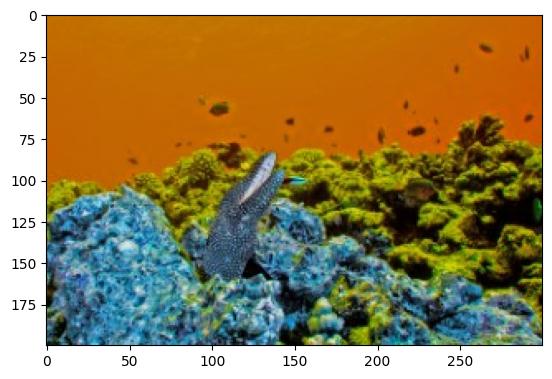

In [ ]:
plt.imshow(img)

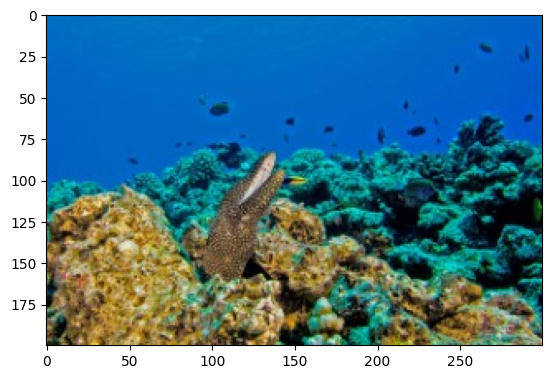

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Loading the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 923 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
#Image
batch[0]

array([[[[ 72.65625   , 149.39844   , 192.96875   ],
         [ 66.67969   , 138.61719   , 176.32812   ],
         [ 49.6875    , 108.8125    , 142.38281   ],
         ...,
         [120.546875  , 155.97656   , 183.13281   ],
         [139.64844   , 176.13281   , 195.90625   ],
         [133.85938   , 172.6875    , 189.85938   ]],

        [[ 71.93379   , 147.17992   , 189.25417   ],
         [ 77.79147   , 150.36192   , 187.86188   ],
         [ 67.224686  , 129.1564    , 163.31491   ],
         ...,
         [116.224915  , 151.18788   , 181.38101   ],
         [128.45354   , 164.11955   , 186.77003   ],
         [115.5294    , 152.79114   , 171.67006   ]],

        [[ 72.23102   , 146.44781   , 184.7636    ],
         [ 78.88507   , 151.43803   , 186.64139   ],
         [ 79.30461   , 145.65068   , 179.54208   ],
         ...,
         [103.41756   , 137.57967   , 171.43202   ],
         [108.400925  , 142.67053   , 170.14319   ],
         [ 91.36008   , 126.24226   , 150.95836   ]],

In [ ]:
#Label
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [ ]:
#Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#Representation of label
batch[1].shape

(32,)

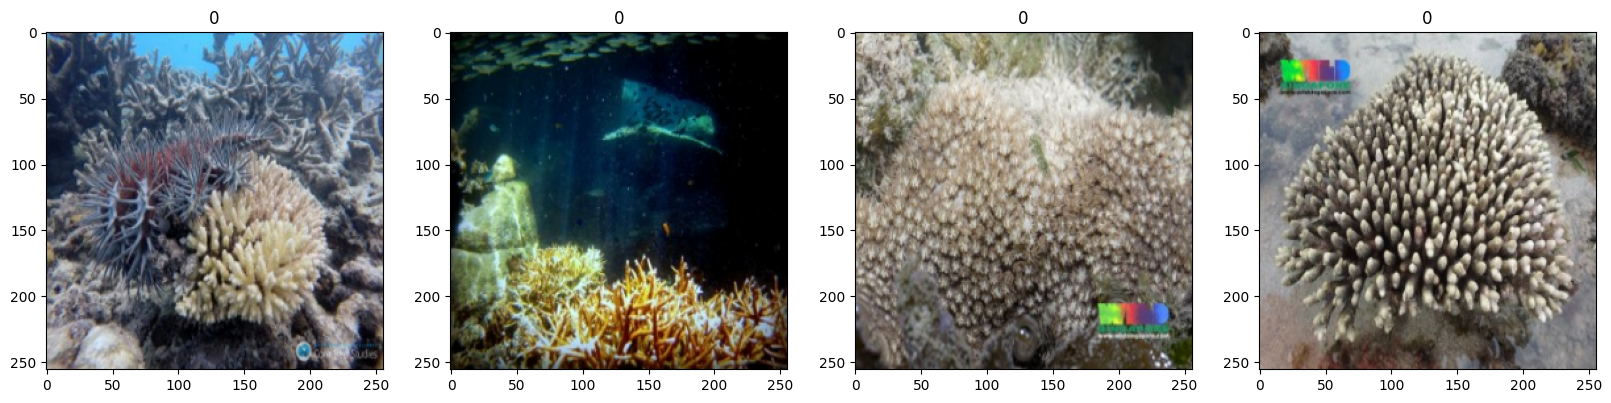

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Processing the data

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 3.14062506e-01, 4.39552695e-01],
          [0.00000000e+00, 3.19669127e-01, 4.48192388e-01],
          [0.00000000e+00, 3.35600495e-01, 4.72855389e-01],
          ...,
          [0.00000000e+00, 4.83486533e-01, 6.51562512e-01],
          [0.00000000e+00, 4.63878691e-01, 6.31495118e-01],
          [0.00000000e+00, 4.44485307e-01, 6.09528184e-01]],
 
         [[0.00000000e+00, 3.30097765e-01, 4.58222747e-01],
          [6.79285382e-04, 3.38792026e-01, 4.69270825e-01],
          [7.16337329e-03, 3.54414642e-01, 4.91669536e-01],
          ...,
          [2.26428453e-03, 4.81983870e-01, 6.51562512e-01],
          [0.00000000e+00, 4.63199377e-01, 6.29539609e-01],
          [0.00000000e+00, 4.46893662e-01, 6.14118516e-01]],
 
         [[0.00000000e+00, 3.36304665e-01, 4.67493385e-01],
          [1.92727486e-03, 3.48131120e-01, 4.81341898e-01],
          [1.34521481e-02, 3.62839401e-01, 5.01871288e-01],
          ...,
          [5.39694401e-03, 4.79722917e-01, 6.5079

Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Splitting the data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Training the data

In [ ]:
val.shape

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 32s 2s/step - loss: 0.8907 - accuracy: 0.5915 - val_loss: 0.6542 - val_accuracy: 0.6187
Epoch 2/20
14/14 [==============================] - 3s 161ms/step - loss: 0.5859 - accuracy: 0.6674 - val_loss: 0.5293 - val_accuracy: 0.7125
Epoch 3/20
14/14 [==============================] - 2s 149ms/step - loss: 0.6145 - accuracy: 0.6741 - val_loss: 0.5447 - val_accuracy: 0.7812
Epoch 4/20
14/14 [==============================] - 6s 464ms/step - loss: 0.5576 - accuracy: 0.7321 - val_loss: 0.4826 - val_accuracy: 0.7625
Epoch 5/20
14/14 [==============================] - 3s 202ms/step - loss: 0.5103 - accuracy: 0.7567 - val_loss: 0.4712 - val_accuracy: 0.7625
Epoch 6/20
14/14 [==============================] - 3s 212ms/step - loss: 0.4952 - accuracy: 0.7746 - val_loss: 0.4383 - val_accuracy: 0.7750
Epoch 7/20
14/14 [==============================] - 5s 319ms/step - loss: 0.4550 - accuracy: 0.7879 - val_loss: 0.4417 - val_accuracy: 0.7688
Epoch 8/

In [ ]:
hist

Plot performance

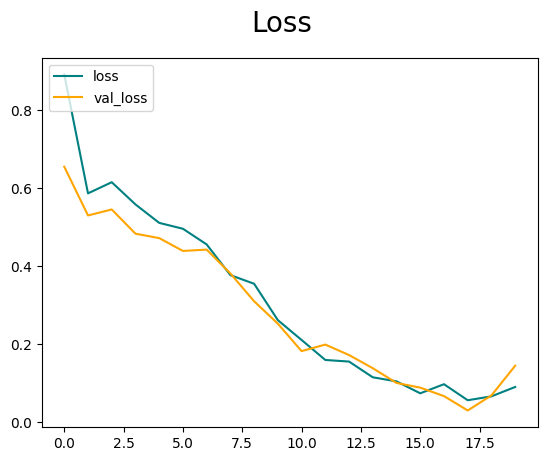

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

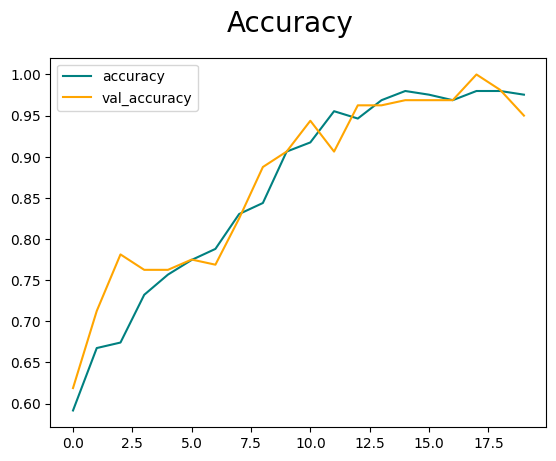

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluating the model

In [ ]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 532ms/step


In [ ]:
print("Precision",pre.result())
print("Recall",re.result())
print("Accuracy", acc.result())

Precision tf.Tensor(0.925, shape=(), dtype=float32)
Recall tf.Tensor(1.0, shape=(), dtype=float32)
Accuracy tf.Tensor(0.94827586, shape=(), dtype=float32)
